In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import seaborn as sns

/tmp/ipykernel_5266/4090892198.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
nPerClust=200
th=np.linspace(0,4*np.pi,nPerClust)
r1=10
r2=15
a=[r1*np.cos(th)+np.random.randn(nPerClust)*3,
  r1*np.sin(th)+np.random.randn(nPerClust)]
b=[r2*np.cos(th)+np.random.randn(nPerClust),
  r2*np.sin(th)+np.random.randn(nPerClust)*3]
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)) ))
data_np=np.hstack((a,b)).T
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()


In [5]:
np.where(labels==0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Text(0, 0.5, 'qwerty dimension 2')

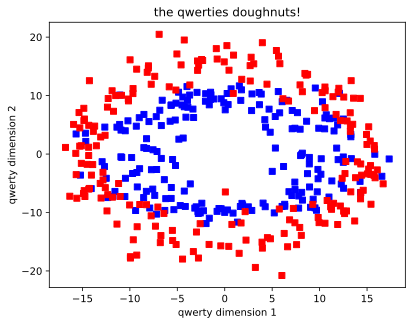

In [7]:
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs' )
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'rs' )
plt.title('the qwerties doughnuts!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
data, labels, test_size=0.2, random_state=42)
train_data=TensorDataset(X_train,y_train) 
test_data=TensorDataset(X_test,y_test)
Train_bs=4
train_loader=DataLoader(train_data,batch_size=Train_bs,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [37]:
class theModelClass(nn.Module):
    def __init__(self):
        super().__init__()

        
        self.input  = nn.Linear(  2,128)
        self.hidden = nn.Linear(128,128)
        self.output = nn.Linear(128, 1)

  
    def forward(self,x):
        x = F.relu( self.input(x) )
        x = F.relu( self.hidden(x) )
        x = self.output(x)
        return x

In [38]:
def createANewModel():

  
    ANNQC = theModelClass()

  
    lossfun = nn.BCEWithLogitsLoss()

  
    optimizer = torch.optim.SGD(ANNQC.parameters(),lr=.01)

    return ANNQC,lossfun,optimizer
     

In [39]:
numepochs = 500

def trainTheModel(ANNQC,lossfun,optimizer):

    trainAcc = []
    testAcc  = []


    for epochi in range(numepochs):

    
        batchAcc = []
        for X,y in train_loader:


            yHat = ANNQC(X)
            loss = lossfun(yHat,y)



            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            batchAcc.append( 100*torch.mean(((yHat>0)==y).float()).item() )

   
        trainAcc.append( np.mean(batchAcc) )

    
        tstacc = []
        for X,y in test_loader:
            yHat = ANNQC(X)
            tstacc.append( 100*torch.mean(((yHat>0) == y).float()).item() )

            testAcc.append(np.mean(tstacc))
  

    return trainAcc,testAcc

     



In [40]:
ANNQC,lossfun,optimizer = createANewModel()

trainAcc,testAcc = trainTheModel(ANNQC,lossfun,optimizer)
     

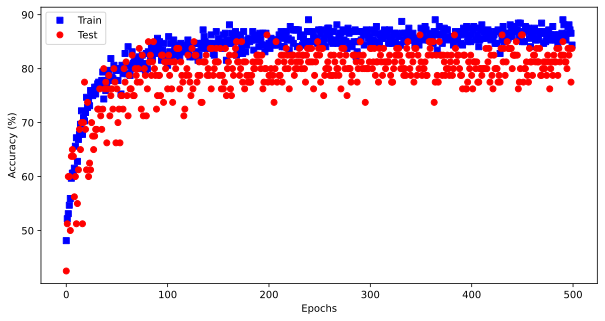

In [41]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'bs')
plt.plot(testAcc,'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

plt.show()
    

In [43]:
ANNQC()

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
      

In [47]:
for X,y in train_loader:


    yHat = ANNQC(X)
    print(yHat.detach()>0)    

tensor([[ True],
        [ True],
        [False],
        [ True]])
tensor([[False],
        [False],
        [False],
        [False]])
tensor([[ True],
        [False],
        [ True],
        [False]])
tensor([[False],
        [ True],
        [False],
        [False]])
tensor([[False],
        [ True],
        [False],
        [False]])
tensor([[False],
        [False],
        [False],
        [ True]])
tensor([[ True],
        [ True],
        [False],
        [False]])
tensor([[False],
        [ True],
        [ True],
        [ True]])
tensor([[False],
        [False],
        [False],
        [False]])
tensor([[False],
        [False],
        [ True],
        [ True]])
tensor([[False],
        [ True],
        [False],
        [False]])
tensor([[ True],
        [ True],
        [False],
        [ True]])
tensor([[False],
        [ True],
        [False],
        [ True]])
tensor([[False],
        [False],
        [False],
        [False]])
tensor([[False],
        [ True],
